In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [3]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [4]:
features.shape

(10000, 130)

In [5]:
observations.shape

(10000, 128)

In [6]:
symptoms = np.append(observations, labels[:,None], 1)
symptoms.shape

(10000, 129)

In [7]:
symptoms_true = symptoms[np.where(symptoms[:,128] != 0)]
symptoms_false = symptoms[np.where(symptoms[:,128] == 0)]

print(symptoms_true.shape)
print(symptoms_false.shape)

(5168, 129)
(4832, 129)


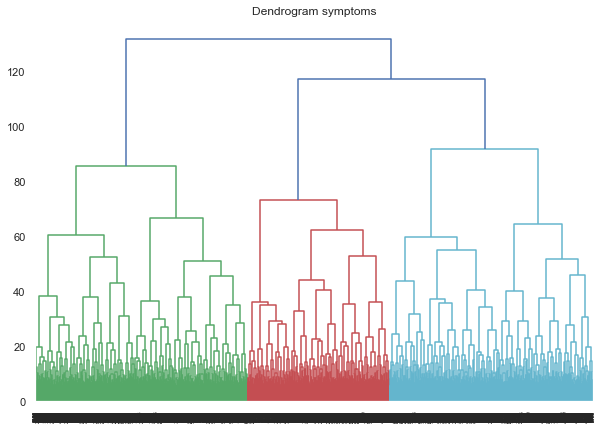

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_true[:,:127], method='ward')) #without the actual labels.
plt.show()

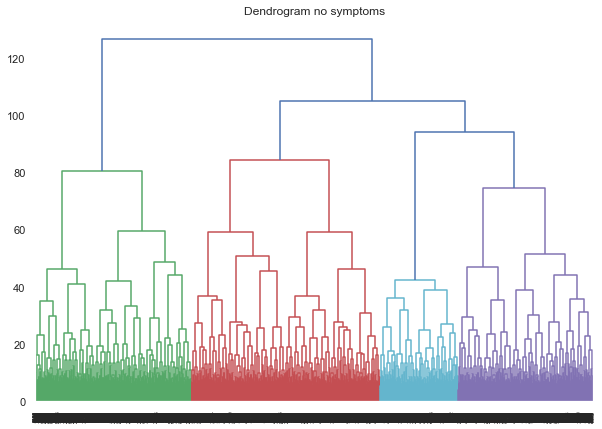

In [9]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram no symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_false[:,:127], method='ward')) #without the actual labels. 
plt.show()

In [10]:
k = 4

In [11]:

cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
#euclidean = distance between datapoints, 'ward' = minimizes the variant between the clusters
h_clusters = cluster.fit_predict(observations)

print(cluster.labels_)

[3 0 0 ... 1 0 0]


In [12]:
def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

In [13]:
centers, k_clusters = find_clusters(observations, k)

In [14]:
k_clusters

array([3, 0, 2, ..., 1, 0, 3])

In [15]:
h_clusters

array([3, 0, 0, ..., 1, 0, 0])

In [16]:
obs_clusters_hier = np.append(observations , h_clusters[:,None], 1)
obs_clusters_kmeans = np.append(observations, k_clusters[:,None], 1)

In [17]:
obs_clusters_hier = np.append(obs_clusters_hier, labels[:,None], 1)
obs_clusters_kmeans = np.append(obs_clusters_kmeans, labels[:,None], 1)

In [18]:
obs_clusters_hier.shape

# last column (130) is labels
# 129 is clusters 

(10000, 130)

In [19]:
labels[:20]

array([1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0])

In [20]:
obs_clusters_hier

array([[0, 0, 0, ..., 0, 3, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1]])

In [21]:
symptoms_true_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] != 0)]
symptoms_true_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] != 0)]


symptoms_true_h.shape

(5168, 130)

In [22]:
symptoms_false_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] == 0)]
symptoms_false_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] == 0)]


symptoms_false_h.shape

(4832, 130)

In [23]:
clusters_no_symp_k = symptoms_false_k[:,128]
clusters_symp_k = symptoms_true_k[:,128]

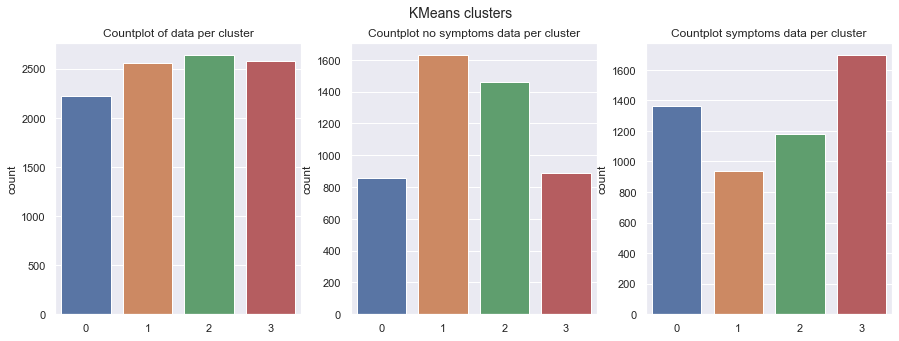

In [24]:
fig1, ax = plt.subplots(figsize = (15, 5), ncols = 3)
sns.countplot(k_clusters, ax = ax[0])
sns.countplot(clusters_no_symp_k, ax = ax[1])
sns.countplot(clusters_symp_k, ax = ax[2])

fig1.suptitle("KMeans clusters", fontsize=14)
ax[0].set_title('Countplot of data per cluster')
ax[1].set_title('Countplot no symptoms data per cluster')
ax[2].set_title('Countplot symptoms data per cluster')


plt.show()

In [25]:
k = 3

In [26]:
obs_symp_true = symptoms_true[:,:128]
labels_symp_true = symptoms_true[:,128]

centers_symp, k_clusters_symp = find_clusters(obs_symp_true, k)
symp_clusters = np.append(obs_symp_true, k_clusters_symp[:,None], 1)
symp_clusters = np.append(symp_clusters, labels_symp_true[:,None], 1)

In [27]:
symp_clusters

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 2],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 2, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [28]:
# symp_clusters[:,129] zijn de symptomen, 
# symp_clusters[:,128] de clusters

In [29]:
symptom_a = symp_clusters[np.where(symp_clusters[:,129] == 1)]
symptom_b = symp_clusters[np.where(symp_clusters[:,129] == 2)]
symptom_both = symp_clusters[np.where(symp_clusters[:,129] == 3)]

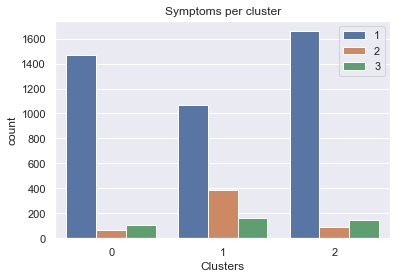

In [30]:
g = sns.countplot(x = symp_clusters[:,128], hue = symp_clusters[:,129])
plt.title('Symptoms per cluster')
plt.xlabel('Clusters')
    
plt.show()

Text(0.5, 1.0, 'countplot hierarchical clusters')

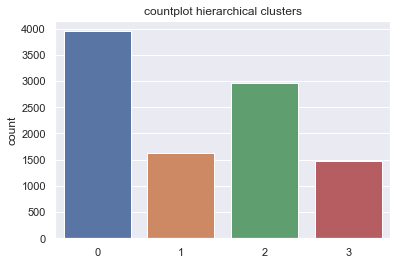

In [31]:
sns.countplot(h_clusters)
plt.title('countplot hierarchical clusters')

Text(0.5, 1.0, 'countplot clusters no symptoms hierarchical')

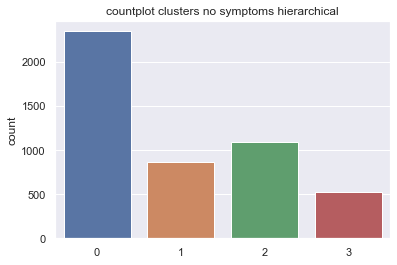

In [32]:
clusters_no_symp_h = symptoms_false_h[:,128]

sns.countplot(clusters_no_symp_h)
plt.title('countplot clusters no symptoms hierarchical')

Text(0.5, 1.0, 'countplot clusters symptoms hierarchical')

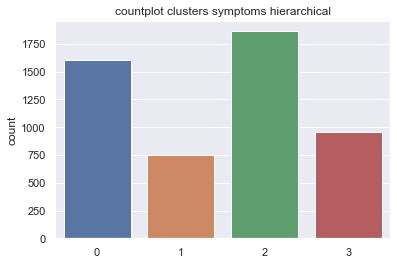

In [33]:
clusters_symp_h = symptoms_true_h[:,128]

sns.countplot(clusters_symp_h)
plt.title('countplot clusters symptoms hierarchical')

For both kmeans clustering and hierarchical clustering the people with symptoms seem to fall in different categories than the people without symptoms, even though there is a lot of overlap. 

In [34]:
# target = labels 
# data = observations

In [35]:
data = np.append(observations, labels[:,None], 1)
data.shape

#target = data[:,128]

(10000, 129)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [37]:
clf = RandomForestClassifier(n_estimators=130, random_state=0)
clf.fit(data[:,:128], data[:,128])

#clf_cv = cross_validate(clf, data[:,:128], data[:,128], cv = 5, return_estimator = True)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
kf = KFold(n_splits=10)
rfc = RandomForestClassifier()
count = 1

X = data[:,:128]
y = data[:,128]

imp_sorted_ = {}
for train, _ in kf.split(X, y):
    rfc.fit(X[train, :], y[train])
    
    for key, value in enumerate(rfc.feature_importances_):    
        imp_sorted_[key] = imp_sorted_.get(key, 0) + value

    
    #print(imp_sorted[:5])
    

/Users/mathieu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [39]:
imp_sorted_

{0: 0.1116570057867024,
 1: 0.13783215599591148,
 2: 0.05629555860422818,
 3: 0.43139372411526944,
 4: 0.08554569537356774,
 5: 0.7264143331774588,
 6: 0.06586079633856286,
 7: 0.06093297645567938,
 8: 0.057255036090200606,
 9: 0.06543521380930697,
 10: 0.050081558440676986,
 11: 0.19859689672607714,
 12: 0.05844091366632048,
 13: 0.06521496580278367,
 14: 0.05585650602799951,
 15: 0.06591309641782452,
 16: 0.06268238566108518,
 17: 0.053498162004294955,
 18: 0.05491459511011052,
 19: 0.05940313588082334,
 20: 0.05196460119262725,
 21: 0.05888562323110694,
 22: 0.0601018653418055,
 23: 0.054619129672941615,
 24: 0.05555001677397005,
 25: 0.05551601023229623,
 26: 0.058594650472747034,
 27: 0.05535694655511178,
 28: 0.06556012730890634,
 29: 0.05444197506684525,
 30: 0.059236362181510224,
 31: 0.055369658087258376,
 32: 0.05692452787110153,
 33: 0.05502107348934089,
 34: 0.06261321579496613,
 35: 0.06261691189230284,
 36: 0.054886652758998435,
 37: 0.060777062839065074,
 38: 0.060113308

In [40]:
Xtrain, Xholdout, ytrain, yholdout = train_test_split(observations, outcome, test_size = 0.5)

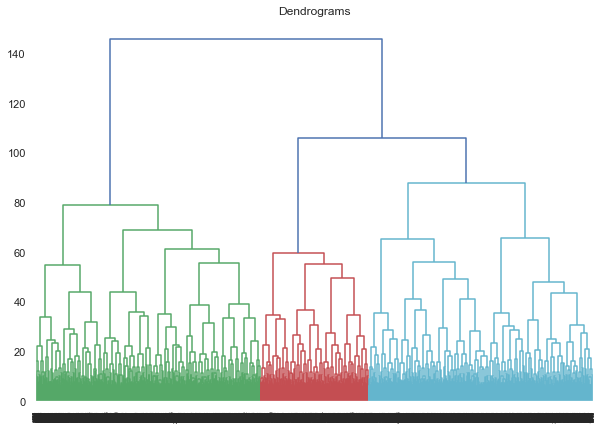

In [41]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Xtrain, method='ward'))
plt.show()

### Measuring the effect of actions.
We also observe the effects of two different therapeutic interventions, one of which is placebo, and the other is an experimental drug. Try and measure
the effectiveness of the placebo versus the active treatment. Are there perhaps cases where the
active treatment is never effective, or should it always be recommended?

In [42]:

features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2




In [43]:
#Effectiveness of the placebo.
rangefeatures = range(len(features))
counter = 0
placebofeatures = []

for i in rangefeatures:
    if labels[i] != 0 and actions[i] == 0 and outcome[i] == 1: # we don't give treatment and the patient is cured
        placebofeatures.append(features[i])

print(len(placebofeatures))
print("Effectiveness : {}%".format((len(placebofeatures)/len(features))*100))

39
Effectiveness : 0.38999999999999996%


In [44]:
#Effectiveness of the placebo.
rangefeatures = range(len(features))
counter = 0
placebofeatures = []

for i in rangefeatures:
    if labels[i] != 0 and actions[i] == 0 and outcome[i] == 0: # we don't give treatment and the patient is cured
        placebofeatures.append(features[i])

print(len(placebofeatures))
print("Effectiveness : {}%".format((len(placebofeatures)/len(features))*100))

2831
Effectiveness : 28.310000000000002%


In [45]:
#Effectiveness of the placebo.
rangefeatures = range(len(features))
counter = 0
placebofeatures = []

for i in rangefeatures:
    if  actions[i] == 0 and outcome[i] == 1: # we don't give treatment and the patient is cured
        placebofeatures.append(features[i])

print(len(placebofeatures))
print("Effectiveness : {}%".format((len(placebofeatures)/len(features))*100))

69
Effectiveness : 0.69%


In [46]:
#Effectiveness of the active treatment.
rangefeatures = range(len(features))
ExperimentalDrugFeaturesSuccess = []

for i in rangefeatures:
    if labels[i] != 0 and actions[i] == 1 and outcome[i] == 1: # we give treatment and the patient is cured
        ExperimentalDrugFeaturesSuccess.append(features[i])

        

print(len(ExperimentalDrugFeaturesSuccess))
print("Effectiveness : {}%".format((len(ExperimentalDrugFeaturesSuccess)/len(features))*100))   

1352
Effectiveness : 13.52%


In [47]:
#Failure of the active treatment.
rangefeatures = range(len(features))
ExperimentalDrugFeaturesFailure = []

for i in rangefeatures:
    if labels[i] != 0 and actions[i] == 1 and outcome[i] == 0: # we give treatment and the patient isn't cured
        ExperimentalDrugFeaturesFailure.append(features[i])

        

print(len(ExperimentalDrugFeaturesFailure))    
print("Proportion : {}%".format((len(ExperimentalDrugFeaturesFailure)/len(features))*100))    

946
Proportion : 9.46%


In [48]:
#No treatment and the patient isn't cured.
rangefeatures = range(len(features))
NoTreatmentFailure = []

for i in rangefeatures:
    if actions[i] == 0 and outcome[i] == 0: # we don't give treatment and the patient isn't cured
        NoTreatmentFailure.append(features[i])

        

print(len(NoTreatmentFailure))

print("Proportion : {}%".format((len(NoTreatmentFailure)/len(features))*100))   

7633
Proportion : 76.33%
